In [1]:
import bmdrc 
import pandas as pd

## Module 1: Input Data Modules 

##### Binary Class

In [2]:
morpho_example_simple = pd.read_csv("/Users/degn400/Git_Repos/bmdrc/data/Binary_Simplified_Long.csv")

Long = bmdrc.input_data_classes.BinaryClass(
    df = morpho_example_simple,
    chemical = "chemical.id",
    plate = "plate.id",
    well = "well",
    concentration = "concentration",
    endpoint = "endpoint",
    value = "value",
    format = "long"
)

## Module 2: Pre-Processing Modules

#### Binary Class: Combine Endpoints

In [3]:
#endpoint_dict = {"ANY24":["MO24", "DP24", "SM24", "NC24"], 
#                 "ANY120":["MORT", "YSE_", "AXIS", "EYE_", "SNOU", "JAW_", "OTIC", "PE__", "BRAI", 
#                           "SOMI", "PFIN", "CFIN", "PIG_", "CIRC", "TRUN", "SWIM", "NC__", "TR__", 
#                           "MO24", "DP24", "SM24", "NC24"],
#                "TOT_MORT":["MO24","MORT"],
#                "ALL_BUT_MORT":["DP24","SM24","NC24", "YSE_", "AXIS", "EYE_", "SNOU", "JAW_", 
#                                "OTIC", "PE__", "BRAI", "SOMI", "PFIN", "CFIN", "PIG_", "CIRC",
#                                "TRUN", "SWIM", "NC__", "TR__"],
#                "BRN_": ["BRAI", "OTIC", "PFIN"],
#                "CRAN":["EYE_", "SNOU", "JAW_"],
#                "EDEM":["YSE", "PE__"],
#                "LTRK":["TRUN", "CFIN"],
#                "MUSC":["CIRC", "SWIM", "SOMI"],
#                "SKIN":["PIG_"],
#                "TCHR":["TR__"]}

endpoint_dict = {"ANY24":["MO24", "DP24", "SM24"], 
                 "ANY":["MO24", "DP24", "SM24", "JAW"]}

# Add new endpoint - twice
Long.combine_and_create_new_endpoints(endpoint_dict)
Long.combine_and_create_new_endpoints({"ANY24":["MO24", "DP24", "SM24", "NC24"]})

ANY24 is already an existing endpoint


#### Binary Class: Set wells to NA

In [4]:
#Long.set_well_to_na(endpoint_name = "MO24", endpoint_value = 1, except_endpoint = ["DP24", "MO24", "SM24", "MORT"])

Long.set_well_to_na(endpoint_name = "DNC", endpoint_value = 1, except_endpoint = ["ANY"])

# These should all be NA, except for ANY
Long.df[Long.df["bmdrc.Well.ID"].isin(["1 3.0 B 1", "1 6.0 A 1"])].iloc[:, :6]

,chemical.id,concentration,plate.id,well,endpoint,value
42,1,3.0,B,1,DP24,NaN
54,1,6.0,A,1,DP24,NaN
186,1,3.0,B,1,SM24,NaN
198,1,6.0,A,1,SM24,NaN
294,1,3.0,B,1,JAW,NaN
306,1,6.0,A,1,JAW,NaN
402,1,3.0,B,1,DNC,NaN
414,1,6.0,A,1,DNC,NaN
42,1,3.0,B,1,ANY24,NaN
54,1,6.0,A,1,ANY24,NaN


#### Binary Class: Remove Endpoint

In [5]:
# DNC should be removed
Long.remove_endpoints("DNC")

In [6]:
endpoint_filtered = Long.df
endpoint_filtered["Endpoint.ID"] = Long.df["chemical.id"].astype("str") + " " + Long.df["endpoint"].astype("str")
pd.DataFrame(pd.unique(endpoint_filtered["Endpoint.ID"]))

,0
0,1 DP24
1,1 NC24
2,1 SM24
3,1 JAW
4,2 DP24
5,2 SM24
6,2 JAW
7,1 ANY24
8,2 ANY24
9,1 ANY


## Module 3: Filtering Modules

#### Negative Control Filter

In [7]:
Long.filter_negative_control(percentage = 18, apply = False, diagnostic_plot = False)

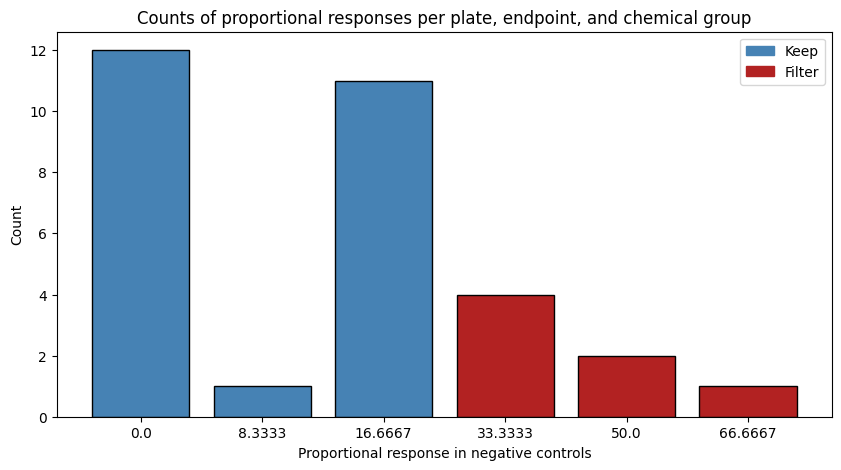

In [8]:
Long.filter_negative_control_plot

In [9]:
Long.filter_negative_control_df

,Response,Count,Filter
0,0.000000,12,Keep
1,8.333333,1,Keep
2,16.666667,11,Keep
3,33.333333,4,Filter
4,50.000000,2,Filter
5,66.666667,1,Filter


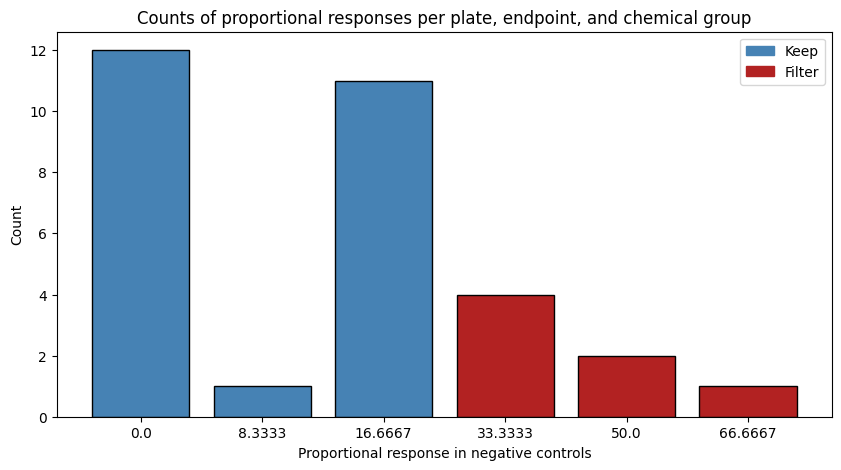

In [10]:
# Apply the negative control filter
Long.filter_negative_control(percentage = 18, apply = True)

#### Minimum Concentration Filter

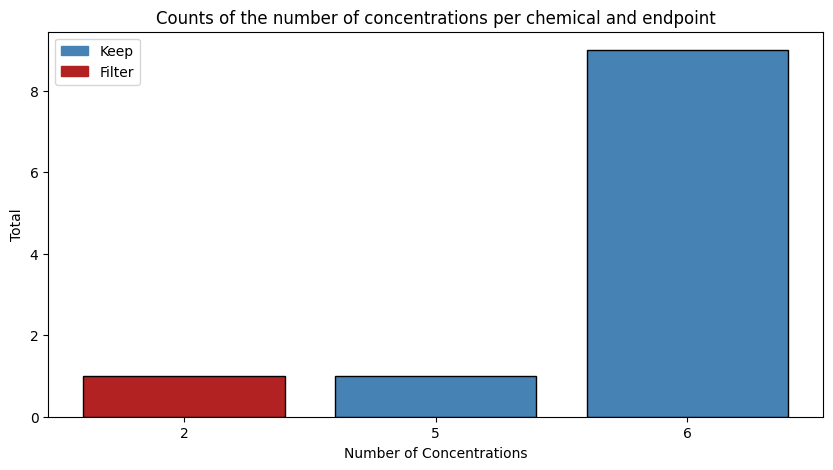

In [11]:
Long.filter_min_concentration(apply = False, diagnostic_plot = True)

In [12]:
Long.filter_min_concentration_df

,NumConc,Count,Filter
0,6,9,Keep
1,5,1,Keep
2,2,1,Filter


#### Correlation Score Filter

In [13]:
Long.filter_correlation_score(score = 0.2, diagnostic_plot = True)

KeyError: 'conc'

In [ ]:
Long.filter_correlation_score_df

,bmdrc.Endpoint.ID,Spearman,Filter
0,3757 ALL_BUT_MORT,0.452381,Keep
1,3757 ANY120,0.785714,Keep
2,3757 ANY24,0.891631,Keep
3,3757 AXIS,0.436436,Keep
4,3757 BRAI,0.383107,Keep
...,...,...,...
94,3863 TCHR,0.082479,Remove
95,3863 TOT_MORT,0.238095,Keep
96,3863 TRUN,-0.155870,Remove
97,3863 TR__,0.082479,Remove


In [ ]:
Long.filter_correlation_score(score = 0.2, apply = True)

mytestdf = Long.plate_groups
mytestdf

,chemical.id,conc,plate.id,endpoint,bmdrc.num.tot,bmdrc.num.nonna,bmdrc.num.affected,bmdrc.Plate.ID,bmdrc.Endpoint.ID,bmdrc.filter,bmdrc.filter.reason
0,3757,0.0,19877,ALL_BUT_MORT,12,12,0.0,3757 19877 ALL_BUT_MORT,3757 ALL_BUT_MORT,Keep,
1,3757,0.0,19877,ANY120,12,12,0.0,3757 19877 ANY120,3757 ANY120,Keep,
2,3757,0.0,19877,ANY24,12,12,0.0,3757 19877 ANY24,3757 ANY24,Keep,
3,3757,0.0,19877,AXIS,12,12,0.0,3757 19877 AXIS,3757 AXIS,Keep,
4,3757,0.0,19877,BRAI,12,12,0.0,3757 19877 BRAI,3757 BRAI,Keep,
...,...,...,...,...,...,...,...,...,...,...,...
2371,3863,10.0,20637,TCHR,12,8,0.0,3863 20637 TCHR,3863 TCHR,Remove,correlation_score_filter
2372,3863,10.0,20637,TOT_MORT,12,8,2.0,3863 20637 TOT_MORT,3863 TOT_MORT,Keep,
2373,3863,10.0,20637,TRUN,12,6,0.0,3863 20637 TRUN,3863 TRUN,Remove,correlation_score_filter
2374,3863,10.0,20637,TR__,12,6,0.0,3863 20637 TR__,3863 TR__,Remove,correlation_score_filter


Filter suggestions: 
- Add a filter to remove a concentration if it doesn't have enough non-NA values 

## Module 4: Fit Models

In [ ]:
Long.fit_models(gof_threshold = 0.1, aic_threshold = 2, model_selection = "lowest BMDL")

In [ ]:
# Summary Statistics for filtered values 
Long.bmds_filtered

,bmdrc.Endpoint.ID,Model,BMD10,BMDL,BMD50,AUC,Min_Dose,Max_Dose,AUC_Norm
0,3757 CFIN,NaN,NaN,NaN,NaN,0.000000,0.0,30.0,0.000000
1,3757 CIRC,NaN,NaN,NaN,NaN,0.000000,0.0,30.0,0.000000
2,3757 EDEM,NaN,NaN,NaN,NaN,1.303977,0.0,30.0,0.043466
3,3757 LTRK,NaN,NaN,NaN,NaN,0.872727,0.0,30.0,0.029091
4,3757 MUSC,NaN,NaN,NaN,NaN,0.436364,0.0,30.0,0.014545
5,3757 NC24,NaN,NaN,NaN,NaN,0.000000,0.0,30.0,0.000000
6,3757 OTIC,NaN,NaN,NaN,NaN,0.000000,0.0,30.0,0.000000
7,3757 PE__,NaN,NaN,NaN,NaN,1.316023,0.0,30.0,0.043867
8,3757 PIG_,NaN,NaN,NaN,NaN,0.983144,0.0,30.0,0.032771
9,3757 SKIN,NaN,NaN,NaN,NaN,0.983144,0.0,30.0,0.032771


In [ ]:
Long.failed_pvalue_test

['3861 PE__', '3861 TR__']

## Module 5: Output Modules

#### Benchmark Dose

In [ ]:
Long.output_benchmark_dose()
response = Long.output_res_benchmark_dose
response

,Chemical_ID,End_Point,Model,BMD10,BMDL,BMD50,AUC,Min_Dose,Max_Dose,AUC_Norm,DataQC_Flag,BMD_Analysis_Flag,BMD10_Flag,BMD50_Flag,bmdrc.Endpoint.ID
48,3863,PFIN,Log Probit,0.0,0.0,0.0,0.595914,0.0,10.0,0.059591,1,2,1,1,3863 PFIN
52,3863,YSE_,Log Probit,0.0,0.0,0.0,0.595914,0.0,10.0,0.059591,1,2,1,1,3863 YSE_
38,3863,AXIS,Log Probit,0.0,0.0,0.0,0.295459,0.0,10.0,0.029546,1,2,1,1,3863 AXIS
39,3863,BRN_,Log Probit,0.0,0.0,0.0,0.457125,0.0,10.0,0.045713,1,2,1,1,3863 BRN_
40,3863,CRAN,Log Probit,0.0,0.0,0.0,0.457125,0.0,10.0,0.045713,1,2,1,1,3863 CRAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,3757,TCHR,NaN,NaN,NaN,NaN,0.000000,0.0,30.0,0.000000,0,0,0,0,3757 TCHR
15,3757,TR__,NaN,NaN,NaN,NaN,0.000000,0.0,30.0,0.000000,0,0,0,0,3757 TR__
16,3757,YSE_,NaN,NaN,NaN,NaN,0.983144,0.0,30.0,0.032771,0,0,0,0,3757 YSE_
17,3861,BRAI,NaN,NaN,NaN,NaN,NaN,0.0,100.0,NaN,0,0,0,0,3861 BRAI


#### Model Fits

In [ ]:
import numpy as np

Long.p_value_df.replace(0, np.nan, inplace = True)

Long.p_value_df

,Logistic,Gamma,Weibull,Log Logistic,Probit,Log Probit,Multistage2,Quantal Linear,bmdrc.Endpoint.ID
0,0.571612,0.589919,NaN,NaN,NaN,0.675032,0.762637,0.575104,3757 ALL_BUT_MORT
1,0.635651,0.494710,NaN,NaN,NaN,0.496297,0.868262,0.873484,3757 ANY120
2,0.446134,0.563600,NaN,NaN,NaN,1.000000,0.932039,0.648077,3757 ANY24
3,0.953643,0.869225,NaN,NaN,NaN,1.000000,0.566138,0.891786,3757 AXIS
4,0.759497,0.646988,NaN,NaN,NaN,1.000000,0.368503,0.717544,3757 BRAI
5,0.729099,0.804838,NaN,NaN,NaN,1.000000,0.579169,0.710190,3757 BRN_
6,0.798166,0.860123,NaN,NaN,NaN,1.000000,0.444671,0.783342,3757 CRAN
7,0.991418,0.994886,NaN,NaN,NaN,1.000000,0.954109,0.995977,3757 DP24
8,0.820400,0.862295,NaN,NaN,NaN,1.000000,0.322354,0.796156,3757 EYE_
9,0.820400,0.862295,NaN,NaN,NaN,1.000000,0.322354,0.796156,3757 JAW_


In [ ]:
Long.aic_df

,Logistic,Gamma,Weibull,Log Logistic,Probit,Log Probit,Multistage2,Quantal Linear,bmdrc.Endpoint.ID
0,84.937195,86.549556,NaN,NaN,NaN,87.237020,94.123746,84.984496,3757 ALL_BUT_MORT
1,123.826416,124.273731,NaN,NaN,NaN,124.301264,131.614963,129.285351,3757 ANY120
2,93.148141,96.124984,NaN,NaN,NaN,inf,110.808466,98.849914,3757 ANY24
3,58.510980,58.605113,NaN,NaN,NaN,inf,74.978489,56.902121,3757 AXIS
4,58.985228,59.673651,NaN,NaN,NaN,inf,73.313297,58.641776,3757 BRAI
5,60.238185,62.611251,NaN,NaN,NaN,inf,82.283569,60.044033,3757 BRN_
6,52.676589,55.019557,NaN,NaN,NaN,inf,71.725359,52.590402,3757 CRAN
7,122.101327,124.269218,NaN,NaN,NaN,inf,131.830074,122.911235,3757 DP24
8,51.619444,53.834245,NaN,NaN,NaN,inf,64.848087,51.485990,3757 EYE_
9,51.619444,53.834245,NaN,NaN,NaN,inf,64.848087,51.485990,3757 JAW_


In [ ]:
Long.bmds

,bmdrc.Endpoint.ID,Model,BMD10,BMDL,BMD50,AUC,Min_Dose,Max_Dose,AUC_Norm,DataQC_Flag
0,3757 ALL_BUT_MORT,Multistage2,14.527262,NaN,9.557108e+01,1.595543,0.0,30.0,0.053185,1
1,3757 ANY120,Quantal Linear,8.405498,NaN,5.529820e+01,4.016566,0.0,30.0,0.133886,1
2,3757 ANY24,Logistic,14.688593,NaN,2.874255e+01,3.148952,0.0,30.0,0.104965,1
3,3757 AXIS,Log Probit,0.000000,0.000000,0.000000e+00,0.872727,0.0,30.0,0.029091,1
4,3757 BRAI,Log Probit,0.000000,0.000000,0.000000e+00,0.983144,0.0,30.0,0.032771,1
5,3757 BRN_,Log Probit,0.000000,0.000000,0.000000e+00,0.983144,0.0,30.0,0.032771,1
6,3757 CRAN,Log Probit,0.000000,0.000000,0.000000e+00,0.983144,0.0,30.0,0.032771,1
7,3757 DP24,Log Probit,0.000000,0.000000,0.000000e+00,1.381515,0.0,30.0,0.046051,1
8,3757 EYE_,Log Probit,0.000000,0.000000,0.000000e+00,0.983144,0.0,30.0,0.032771,1
9,3757 JAW_,Log Probit,0.000000,0.000000,0.000000e+00,0.983144,0.0,30.0,0.032771,1


## Benchmark Dose Curves

In [ ]:
Long.response_curve(chemical_name = 1, endpoint_name = "ANY24", model = "weibull")

In [ ]:
Long.report(out_folder = "/Users/degn400/Downloads/bmdrc_simple_example")

In [ ]:
# Collapse all reasons why data was removed 
filter_reasons = Long.plate_groups[Long.plate_groups["bmdrc.filter"] == "Remove"][["bmdrc.Endpoint.ID","bmdrc.filter.reason"]].drop_duplicates().assign(
    negative_control = lambda x: ["negative_control_filter" in y for y in x["bmdrc.filter.reason"]],
    min_concentration = lambda x: ["min_concentration_filter" in y for y in x["bmdrc.filter.reason"]],
    correlation_score = lambda x: ["correlation_score_filter" in y for y in x["bmdrc.filter.reason"]]
)

def get_filter_count(name):
    filter_group = filter_reasons.groupby("bmdrc.Endpoint.ID").apply(lambda x: any(x[name])).reset_index()
    return(str(len(filter_group[filter_group[0] == True])))

get_filter_count("correlation_score")

#    min_concentation = lambda x: any(x["min_concentration"]),
#    correlation_score = lambda x: any(x["correlation_score"])
#)


'44'

In [66]:
plate_groups = Long.plate_groups
zero_conc = plate_groups[plate_groups["conc"] == 0]